## Batch Gradient Descent

In [316]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [317]:
np.random.seed(seed=1)

In [318]:
x = np.random.uniform(0, 1, 12)

In [319]:
x

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01])

In [320]:
def f(x):
	return 2*x + 0

In [321]:
noise = 0.15

In [322]:
noise = np.random.randn(x.shape[0])

In [323]:
noise

array([ 0.3190391 , -0.24937038,  1.46210794, -2.06014071, -0.3224172 ,
       -0.38405435,  1.13376944, -1.09989127, -0.17242821, -0.87785842,
        0.04221375,  0.58281521])

In [324]:
y = f(x) + noise

In [325]:
y

array([ 1.15308311,  1.19127861,  1.46233669, -1.45547556, -0.02890542,
       -0.19937717,  1.50628987, -0.40876981,  0.62110674,  0.19977505,
        0.88060278,  1.95325421])

### Plotting

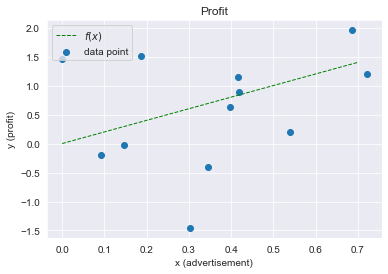

In [326]:
plt.scatter(x, y, marker='o', label='data point')
plt.plot([0, .7], [f(0), 1.4], 'g--', lw=1, label='$f(x)$')
plt.xlabel('x (advertisement)')
plt.ylabel('y (profit)')

plt.title('Profit')
plt.legend(loc=2)

In [327]:
def neuron(x, w):
	return w*x + 0

In [328]:
def loss_mse(y_pred, y_true):
	return np.mean((y_true - y_pred)**2)

In [329]:
ws = np.linspace(0, 4, num=50)

loss_ws = [loss_mse(neuron(x,w), y) for w in ws]

In [330]:
loss_ws

[1.2082098921405882,
 1.1674854725204862,
 1.1290504836618833,
 1.0929049255647787,
 1.059048798229173,
 1.0274821016550655,
 0.9982048358424563,
 0.9712170007913462,
 0.9465185965017341,
 0.9241096229736206,
 0.9039900802070061,
 0.8861599682018899,
 0.870619286958272,
 0.8573680364761528,
 0.8464062167555323,
 0.8377338277964101,
 0.8313508695987867,
 0.8272573421626613,
 0.8254532454880348,
 0.825938579574907,
 0.8287133444232776,
 0.8337775400331465,
 0.8411311664045144,
 0.8507742235373804,
 0.8627067114317452,
 0.8769286300876086,
 0.8934399795049703,
 0.9122407596838306,
 0.9333309706241896,
 0.9567106123260468,
 0.9823796847894027,
 1.0103381880142572,
 1.0405861220006103,
 1.073123486748462,
 1.1079502822578118,
 1.1450665085286604,
 1.1844721655610075,
 1.226167253354853,
 1.2701517719101976,
 1.3164257212270398,
 1.364989101305382,
 1.4158419121452217,
 1.46898415374656,
 1.5244158261093965,
 1.582136929233732,
 1.6421474631195656,
 1.7044474277668984,
 1.7690368231757299,
 

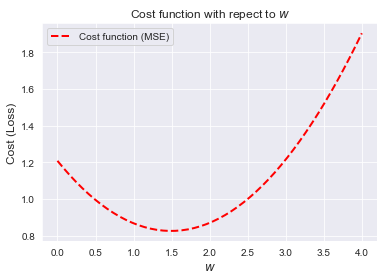

In [331]:
plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function (MSE)')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function with repect to $w$')
plt.legend()

In [332]:
from sklearn import linear_model

In [333]:
lm = linear_model.LinearRegression()

In [334]:
x.shape

(12,)

In [335]:
X = x.reshape(-1, 1)

In [336]:
X.shape

(12, 1)

In [337]:
lm.fit(X, y)

LinearRegression()

In [338]:
print(lm.coef_, lm.intercept_)

[1.15544857] 0.16364380562713238


In [339]:
# Gradient Function
def gredient(w, x, y_true):
	y_pred = neuron(x, w)
	return 2 * x * (y_pred - y_true)

In [341]:
def delta_w(w_k, x, y, learning_rate):
	return learning_rate * np.mean(gredient(w_k, x, y))

In [354]:
# init
w = 3.7
learning_rate = 0.9

# perform
no_of_iterations = 20 # amount of epoch

history_loss = [(w, loss_mse(neuron(x, w), y))]
for i in range(no_of_iterations):
	dw = delta_w(w, x, y, learning_rate)
	w = w - dw # update current weight 
	history_loss.append((w, loss_mse(neuron(x, w), y)))


for i in range(0, len(history_loss)):
	print('{} -> w: {:.2f} \t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))


0 -> w: 3.70 	 loss: 1.6621438296932975
1 -> w: 3.02 	 loss: 1.2246739976515155
2 -> w: 2.55 	 loss: 1.0159125324316314
3 -> w: 2.22 	 loss: 0.9162911501814602
4 -> w: 2.00 	 loss: 0.8687516304191244
5 -> w: 1.84 	 loss: 0.8460656779841531
6 -> w: 1.73 	 loss: 0.8352398968139879
7 -> w: 1.66 	 loss: 0.8300738127238336
8 -> w: 1.61 	 loss: 0.8276085472240936
9 -> w: 1.57 	 loss: 0.826432117673558
10 -> w: 1.55 	 loss: 0.8258707231756756
11 -> w: 1.53 	 loss: 0.8256028246159115
12 -> w: 1.52 	 loss: 0.825474982895705
13 -> w: 1.51 	 loss: 0.8254139765751042
14 -> w: 1.51 	 loss: 0.8253848642387936
15 -> w: 1.50 	 loss: 0.8253709717745847
16 -> w: 1.50 	 loss: 0.8253643422633102
17 -> w: 1.50 	 loss: 0.8253611786474764
18 -> w: 1.50 	 loss: 0.8253596689637716
19 -> w: 1.49 	 loss: 0.8253589485397348
20 -> w: 1.49 	 loss: 0.8253586047519664


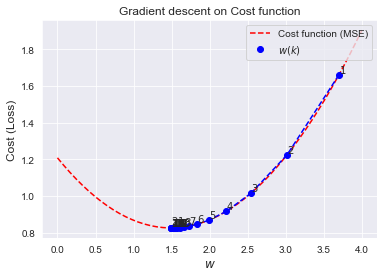

In [355]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')
for i in range(0, len(history_loss) -1):
	w1, c1 = history_loss[i]
	w2, c2 = history_loss[i+1]
	plt.plot(w1, c1, 'bo')
	plt.plot([w1, w2], [c1, c2], 'b--')
	plt.text(w1, c1+0.01, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2,c2+0.02,f'${i+2}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)

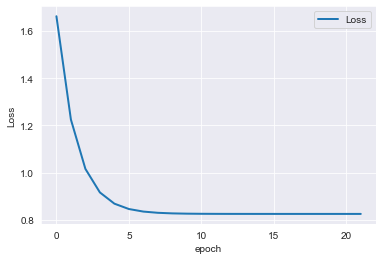

In [356]:
epoch = np.linspace(0, len(history_loss), num=len(history_loss)).astype('int')
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch, step_loss, lw=2, label='Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()